# Decision Tree Classifier using CART and Gini Impurity

## Step 1: Import necessary libraries

* `pandas` is used for data manipulation and analysis, especially for handling tabular data (like DataFrames). It is imported and given the alias `pd`

* The `DecisionTreeClassifier` class and the `plot_tree` function from scikit-learn’s tree module are then imported. The `DecisionTreeClassifier` is used to create and train a decision tree model and the `plot_tree` function is used to visualize the decision tree.

* The `train_test_split` function from scikit-learn’s model_selection module is also imported. It is used to split the dataset into training and testing sets, which is necessary for evaluating model performance.

* The `classification_report` and `accuracy_score` from scikit-learn’s metrics module are also imported. They are used to evaluate the performance of the classifier. `classification_report` gives detailed metrics (precision, recall, f1-score), and `accuracy_score` gives the overall accuracy.

* The matplotlib plotting library is imported and given the alias `plt`. Matplotlib is used for creating visualizations, such as plotting the decision tree.

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Step 2: Load and Explore the Data

`url = 'https://github.com/course-files/DataAnalytics/raw/refs/heads/main/data/subscription_churn.csv'`
* Specifies the location where the `.csv` dataset can be found

`subscription_churn_data = pd.read_csv(url)`
* Used to load the dataset into the data frame called `subscription_churn_data`

`print("\nThe dimensions (number of observations and number of dimensions):")`
`print(subscription_churn_data.shape)`
* Prints the string "The dimensions (number of observations and number of dimensions):" using the `print()` function and then uses the `shape` attribute to print the number of rows and columns in the data frame. This gives you an idea of how many observations (rows) and dimensions (columns) are present in the dataset.

`X = pd.DataFrame(subscription_churn_data, columns = ['monthly_fee','customer_age','support_calls'])`
* Separates the data such that the data frame called `X` contains only the features (independent variables or predictors)

`y = pd.Series(subscription_churn_data['renew'])`
* Separates the data such that the data frame called `y` contains only the target (dependent variable or outcome)

`print("\nThe whole dataset:")`
`display(subscription_churn_data)`
* Prints the string "The whole dataset:" using the `print()` function and then uses the `display()` function to show the dataset with all the features and the target as one data frame. This allows you to confirm the data that will be used.

`print("The feature data (independent variables or predictors):")`
`print(X.head())`
* Prints the string "The feature data (independent variables or predictors):" using the `print()` function and then uses the `head()` function to print the first five rows of the feature data frame that was named `X`. This allows you to quickly inspect the structure and values of the features.

`print("\nTarget labels (the dependent variable or outcome):")`
`print(y.head())`
* Prints the string "The feature data (independent variables or predictors):" using the `print()` function and then uses the `head()` function to print the first five rows of the feature data frame that was named `y`. This allows you to quickly inspect the structure and values of the target.

`print("\nPercentage distribution for each category in y:")`
`print(y.value_counts(normalize=True) * 100)`
* Prints the string "Percentage distribution for each category in y:" using the `print()` function and then uses the `value_counts()` function to print the proportion of values in each class.

In [33]:
url = 'https://raw.githubusercontent.com/course-files/RegressionAndClassification/refs/heads/main/data/subscription_churn.csv'
subscription_churn_data = pd.read_csv(url)
# subscription_churn_data = pd.read_csv('./data/subscription_churn.csv')

print("\nThe dimensions (number of observations and number of dimensions):")
print(subscription_churn_data.shape)

X = pd.DataFrame(subscription_churn_data, columns = ['monthly_fee','customer_age','support_calls'])
y = pd.Series(subscription_churn_data['renew'])

print("\nThe data types:")
print(subscription_churn_data.info())

print("\nThe summary of the numeric columns:")
display(subscription_churn_data.describe())

print("\nThe whole dataset:")
display(subscription_churn_data)

print("The feature data (independent variables or predictors):")
print(X.head())

print("\nTarget labels (the dependent variable or outcome):")
print(y.head())

print("\nPercentage distribution for each category in y:")
print(y.value_counts(normalize=True) * 100)


The dimensions (number of observations and number of dimensions):
(1000, 4)

The data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_fee    1000 non-null   float64
 1   customer_age   1000 non-null   float64
 2   support_calls  1000 non-null   int64  
 3   renew          1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB
None

The summary of the numeric columns:


,monthly_fee,customer_age,support_calls,renew
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.193260,35.708800,0.946000,0.794000
std,9.792202,9.973069,0.983896,0.404633
min,17.590000,5.600000,0.000000,0.000000
25%,43.520000,28.900000,0.000000,1.000000
50%,50.255000,35.600000,1.000000,1.000000
75%,56.482500,42.300000,1.000000,1.000000
max,88.530000,66.900000,6.000000,1.000000



The whole dataset:


,monthly_fee,customer_age,support_calls,renew
0,54.97,49.0,1,1
1,48.62,44.2,0,1
2,56.48,35.6,0,1
3,65.23,28.5,2,1
4,47.66,42.0,2,1
...,...,...,...,...
995,47.19,45.7,1,0
996,67.98,34.7,1,1
997,56.41,26.2,0,1
998,44.29,33.4,2,1


The feature data (independent variables or predictors):
   monthly_fee  customer_age  support_calls
0        54.97          49.0              1
1        48.62          44.2              0
2        56.48          35.6              0
3        65.23          28.5              2
4        47.66          42.0              2

Target labels (the dependent variable or outcome):
0    1
1    1
2    1
3    1
4    1
Name: renew, dtype: int64

Percentage distribution for each category in y:
renew
1    79.4
0    20.6
Name: proportion, dtype: float64


## Step 3: Split the data into training and testing sets

- `train_test_split` is a function from scikit-learn that splits your dataset into two parts: one for training the model and one for testing it.
- `X` is your feature data (inputs), and `y` is your target data (outputs/labels).
- `test_size=0.3` means 30% of the data will be used for testing, and the remaining 70% for training.
- `random_state=53` sets a seed for the random number generator, ensuring that the split is reproducible (you get the same split every time you run the code).

- The `train_test_split` function returns four objects:
  - `X_train`: features for training
  - `X_test`: features for testing
  - `y_train`: labels for training
  - `y_test`: labels for testing

**Why:**  
Splitting the data this way allows you to train your model on one part of the data and evaluate its performance on unseen data, which helps prevent overfitting and gives a realistic measure of model accuracy.

Analogy: This is similar to how a student learning a subject is not exposed to only one past paper that they then memorize. If they memorize the past paper and the exam assesses them on a different set of questions, then their performance in the exam will not be the same as their performance in the memorized past paper.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=53
)

## Step 4: Create and Train the CART Decision Tree

**Explanation:**

- `model = DecisionTreeClassifier(criterion="gini", random_state=53)`
  - This creates an instance of a decision tree classifier using the CART algorithm.
  - **criterion="gini"**: Specifies that the tree should use the Gini impurity measure to decide splits (the default for CART).
  - **random_state=53**: Ensures reproducibility by setting the random seed.

- `model.fit(X_train, y_train)`
  - This trains (fits) the decision tree classifier on the training data (`X_train` for features, `y_train` for the target).
  - This step therefore builds the decision tree model so it can learn patterns from the training data and later make predictions on new, unseen data.

In [35]:
# Using Gini impurity by default
model = DecisionTreeClassifier(
    criterion="gini",
    random_state=53,
    max_depth=3,)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=53)

## Step 5: Evaluate the Model

`y_pred = model.predict(X_test)`

- This uses the trained decision tree classifier (`model`) to predict the labels for the test set features (`X_test`). This gives you the model’s predictions on data it has not seen before, which is necessary for evaluating its performance.

`print("Classification Report:\n", classification_report(y_test, y_pred))`
- This prints a detailed classification report comparing the true labels (`y_test`) to the predicted labels (`y_pred`). The report includes precision, recall, F1-score, and support for each class, enabling you to understand how well the model performs for each category.
- It shows the performance metrics for a model that predicts two classes:
    - Class 0
    - Class 1

- There are 300 total items tested:
    - 56 items belong to class 0
    - 244 items belong to class 1

| Term             | Meaning                                                                                                                             |
|------------------|-------------------------------------------------------------------------------------------------------------------------------------|
| **Precision**    | Out of all items the model said are class X, how many are actually class X?                                                         |
| **Recall**       | Out of all actual items in class X, how many did the model correctly find?                                                          |
| **F1-score**     | A balance between precision and recall such  that a higher value means better balance.                                              |
| **Support**      | The number of actual items in that class.                                                                                           |
| **Macro avg**    | The average of precision, recall, and F1-score for both classes, treating them equally.                                             |
| **Weighted avg** | The average of precision, recall, and F1-score, but weighted by how many samples are in each class (so class 1 has more influence). |

- The results show that the model is much better at predicting class 1 than class 0, and overall gets 75% of predictions correct. This may be because there are more class 1 cases in the data.

In [36]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.23      0.31        56
           1       0.84      0.94      0.89       244

    accuracy                           0.81       300
   macro avg       0.65      0.59      0.60       300
weighted avg       0.77      0.81      0.78       300



## Step 6: Visualize the Decision Tree

`plt.figure(figsize=(12, 8))`
This creates a new matplotlib figure with a size of 12 inches by 8 inches to ensure that the decision tree plot is large and readable.

`plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)`
- Plots the trained decision tree (`model`).
    - `feature_names=iris.feature_names`: Labels the tree’s nodes with the feature names.
    - `class_names=iris.target_names`: Labels the leaves with the class names.
    - `filled=True`: Colors the nodes based on the class for better visualization.
- This visually shows how the decision tree splits the data and makes decisions.

`plt.title("A Decision Tree Classifier using Gini Impurity (CART)")`
- Sets the title of the plot to provide context for the visualization.

`plt.show()`
- This is used to display the plot in the notebook.

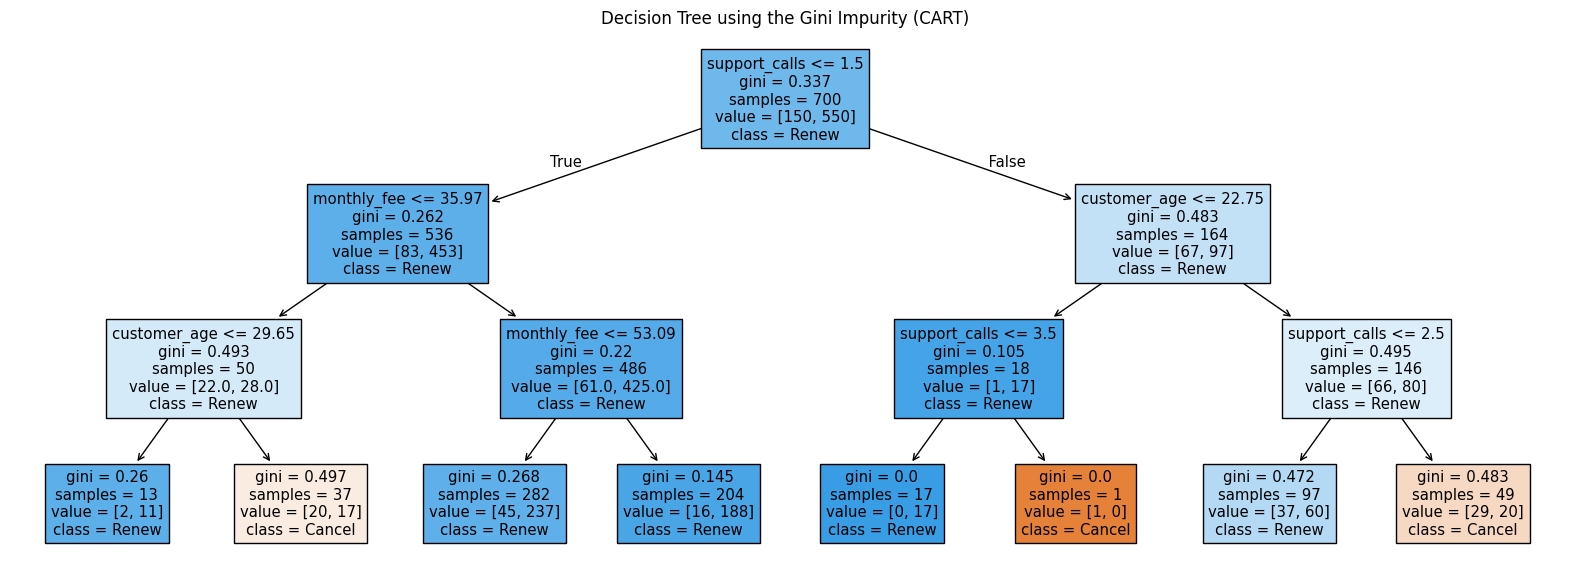

In [37]:
plt.figure(figsize=(20, 7))
plot_tree(
    model,
    feature_names=['monthly_fee','customer_age','support_calls'],
    class_names= ['Cancel', 'Renew'],
    filled=True,
    max_depth=3)
plt.title("Decision Tree using the Gini Impurity (CART)")
plt.show()

In [38]:
# Example: Using the trained model to make predictions on new/unseen data
# Create a DataFrame with new customer data (replace values as needed)
new_data = pd.DataFrame({
    'monthly_fee': [50, 80, 48],
    'customer_age': [25, 40, 50],
    'support_calls': [2, 0, 1]
})

# Predict whether these 3 customers will renew or cancel their subscription
predictions = model.predict(new_data)
print("Predictions for new data:", predictions)

label_map = {0: 'Cancel', 1: 'Renew'}
predicted_labels = [label_map[p] for p in predictions]
print("Predicted labels for new data:", predicted_labels)

Predictions for new data: [1 1 1]
Predicted labels for new data: ['Renew', 'Renew', 'Renew']
